# Introduction to the datatoolbox
by Andreas Geiges


## Core concepts

Toolbox + Database (datashelf)

### Toolbox
Main purpose is to avoid duplicated work and provide standardized data workflows
- Read-in of different data sources
- Make results of other projects accessible for all
- Avoid copy pase errors
- Unit conversion
- Table computations
- Interfaces to other applications
    - Pandas
    - Excel
    - pyAM

### Database
Not a real database, but a managed git repository of csv files and raw data
- Low level implementations (no software needed)
- Everthing is accessible using office tools
- Version control allows to track all changes
- Consist of homogeneous datatables
    - Pandas datatable, with meta data
    - Only contains one variable
    - Unique ID



## Installation

### Install datatoolbox package
Currently not in the official pypi repository:
pip install -i https://test.pypi.org/simple/ datatoolbox

### Download of CA dataself
Currently on BOX:
https://climateanalytics.app.box.com/file/659791553750

1) Download and unpack
2) Store path to the unpacked datashelf folder


In [1]:
import datatoolbox as dt

{}
core in 0.7684 seconds
data structure in 0.5307 seconds
databdase in read only mode
core database in 0.4160 seconds
mapping in 0.0000 seconds
IO in 0.0000 seconds
Interfaces in 0.0007 seconds
utils in 0.0000 seconds
15 source reader found and added into "datatoolbox.sources".
raw sources in 1.2094 seconds
sets in 0.0021 seconds


### Set personal settings

In [2]:
dt.admin.change_personal_config()

Welcome AG
You chose: /media/sf_Documents/datashelf

file_path_variable =  /media/sf_Documents/datashelf/


In [3]:
## Get information about dataself
dt.DBinfo()

AttributeError: module 'datatoolbox' has no attribute 'DBinfo'

## Basic functionalities

### dt.find()
Search within the inventory of the datashelf

In [ ]:
#%% The underlying inventory
inventory = dt.find() #returns the full inventory
print(inventory.head())

In [25]:
res = dt.find(entity='', category='', scenario ='', source='')
# entity   : Physical entity
# category : Detailed subcategory
# scenario : model / scenario
# (model)  : will be implemented soon
# sources  : Provider of the data

# applies the pandas funciton contains (string)

In [26]:
dt.find(entity='Share')

,entity,category,scenario,source
qID,,,,
Share_primary_schools_access_electricity||historic|SDG_DB_2019,Share_primary_schools_access_electricity,NaN,historic,SDG_DB_2019
Share_area|Agriculture||historic|WDI_2019,Share_area|Agriculture,NaN,historic,WDI_2019
Share_area|Forest||historic|WDI_2019,Share_area|Forest,NaN,historic,WDI_2019
Value_added|Share_of_GDP|Industry||historic|WDI_2019,Value_added|Share_of_GDP|Industry,NaN,historic,WDI_2019
Share_electricity_generation|Coal||historic|WDI_2019,Share_electricity_generation|Coal,NaN,historic,WDI_2019
Share_electricity_generation|Gas||historic|WDI_2019,Share_electricity_generation|Gas,NaN,historic,WDI_2019
Share_electricity_generation|Nuclear||historic|WDI_2019,Share_electricity_generation|Nuclear,NaN,historic,WDI_2019
Share_outages|firms||historic|WDI_2019,Share_outages|firms,NaN,historic,WDI_2019
Share_of_world_population||Historic|WEO_2019,Share_of_world_population,NaN,Historic,WEO_2019


In [27]:
# Results are provided as a pandas dataframe
resDf = dt.find(entity='Share')
resDf.scenario.unique()

array(['historic', 'Historic', 'Stated_policies', 'Current_policies',
       'Sustainable_development'], dtype=object)

### dt.findExact

Only returns exact matches

In [ ]:
dt.findExact(entity='', category='', scenario ='', source='')

In [28]:
dt.findExact(entity='Share')

,entity,category,scenario,source
qID,,,,


## getTable(ID)
returns a DataTable

In [ ]:
tableID = 'population|all|PROJECTION_LOW|UN_WPP2017'

table = dt.getTable(tableID)
print(table)

## dt.getTables(ID_list)
returns a TableSet

In [29]:
ID_list = resDf.index
tables = dt.getTables(ID_list)

## Datatable
Is referenced by its tableID, which consists currently of the for required meta data 
components:

(will include model in the future as well)

In [ ]:
dt.config.ID_FIELDS

In [ ]:
table.meta

### Needs have a unit that is conistent and known:

In [ ]:
dt.config.REQUIRED_META_FIELDS

## Unit handling and conversion

In [5]:
countryList = ['USA', 'GBR','IND','DEU']
years = [2010, 2011, 2012, 2013]
emissions_CO2 = dt.getTable('Emissions|CO2||historic|WDI_2019').loc[countryList,years]

print(emissions_CO2)


=== Datatable - Emissions|CO2||historic|WDI_2019 ===
ID: Emissions|CO2||historic|WDI_2019 
category:  
creator: AG 
entity: Emissions|CO2 
modified: 2020/04/20-02:34:58 
original code: EN.ATM.CO2E.KT 
original name: CO2 emissions (kt) 
scenario: historic 
source: WDI_2019 
unit: MtCO2 
unitTo: MtCO2 
                     2010         2011         2012         2013
Country Code                                                    
USA           5395.532125  5289.680503  5119.436361  5159.160972
GBR            493.207833   447.828708   468.572927   458.250322
IND           1719.690988  1841.776419  2018.503817  2034.752294
DEU            758.859981   732.497918   739.861254   757.312507


## Conversion of individual tables

In [6]:
emissions_CO2 = emissions_CO2.convert('Gt CO2')
print(emissions_CO2)

=== Datatable - Emissions|CO2||historic|WDI_2019 ===
ID: Emissions|CO2||historic|WDI_2019 
category:  
creator: AG 
entity: Emissions|CO2 
modified: 2020/05/25-11:08:06 
original code: EN.ATM.CO2E.KT 
original name: CO2 emissions (kt) 
scenario: historic 
source: WDI_2019 
unit: Gt CO2 
unitTo: MtCO2 
                  2010      2011      2012      2013
Country Code                                        
USA           5.395532  5.289681  5.119436  5.159161
GBR           0.493208  0.447829  0.468573  0.458250
IND           1.719691  1.841776  2.018504  2.034752
DEU           0.758860  0.732498  0.739861  0.757313


## Calculations with automatic unit conversion

In [7]:
population = dt.getTable('Population||historic|WDI_2019').loc[countryList,years+ [2014]]
population

,2010,2011,2012,2013,2014
Country Code,,,,,
USA,309.326085,311.580009,313.874218,316.057727,318.386421
GBR,62.766365,63.258918,63.700300,64.128226,64.613160
IND,1234.281170,1250.288729,1265.782790,1280.846129,1295.604184
DEU,81.776930,80.274983,80.425823,80.645605,80.982500


In [8]:
emissions_per_capita = emissions_CO2 / population
print(emissions_per_capita)

=== Datatable ===
unit: CO2 * gigametric_ton / millions 
source: calculation 
                  2010      2011      2012      2013  2014
Country Code                                              
USA           0.017443  0.016977  0.016310  0.016323   NaN
GBR           0.007858  0.007079  0.007356  0.007146   NaN
IND           0.001393  0.001473  0.001595  0.001589   NaN
DEU           0.009280  0.009125  0.009199  0.009391   NaN


In [9]:
print(emissions_per_capita.convert('t CO2 / count').clean())

AttributeError: 'Datatable' object has no attribute 'clean'

In [ ]:
table_N2O_Agri = dt.getTable('Emissions|N2O|Agriculture||Historic|FAO_2019')
table_N2O_Agri.meta

In [ ]:
table_N2O_Agri = table_N2O_Agric.loc[countryList,years]
table_N2O_Agri

In [ ]:
table_N2O_Agri.convert('Mt N2O')

In [ ]:
table_CH4_Agri = dt.getTable('Emissions|CH4|Agriculture||Historic|FAO_2019').loc[countryList,years]
table_CH4_Agri

In [ ]:
table_CH4_Agri + table_N2O_Agri

## Greenhouse warming potential conversion

In [ ]:
#table_CH4_Agri = table_CH4_Agri.convert('Mt CO2eq', context='GWPAR4')
#table_N2O_Agri = table_N2O_Agri.convert('Mt CO2eq', context='GWPAR4')
table_N2O_CH4_Agri = table_CH4_Agri + table_N2O_Agri
table_N2O_CH4_Agri

In [ ]:
table_N2O_CH4_Agri.meta.update({'entity'   : 'Emissions|N2O&CH4|Agriculture',
                               'category' : 'Agriculture',
                               'scenario' : 'Historic_computed',
                               'source'   : 'CA_2020',
                               'based_on' : 'FAO_2016'})
table_N2O_CH4_Agri

### Visualization

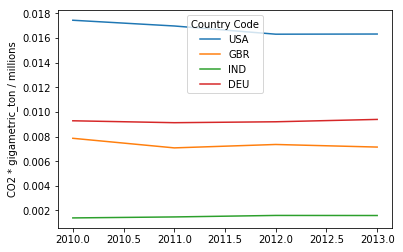

In [10]:
emissions_per_capita.vis.plot()

In [11]:
emissions_per_capita.vis.to_map()

AttributeError: 'Visualization' object has no attribute 'columns'

## TableSet
Dictionary like strucuture of datatables
Keys are the IDs of the included tables
Each table set has an inventory

Create a Tablet as:
 - dt.TableSet()
 - dt.getTables(ID_list)

In [12]:
wdi_table_IDs = dt.find(source='WDI_2019')
print(wdi_table_IDs.index)

Index(['Emissions|CO2||historic|WDI_2019',
       'GDP|PPP|constant_2011||historic|WDI_2019',
       'Population||historic|WDI_2019', 'Area|Agriculture||historic|WDI_2019',
       'Share_area|Agriculture||historic|WDI_2019',
       'Area|Forest||historic|WDI_2019',
       'Share_area|Forest||historic|WDI_2019',
       'Emissions_intensity|CO2_per_GDP_PPP||historic|WDI_2019',
       'Value_added|Share_of_GDP|Industry||historic|WDI_2019',
       'Life_expcetancy_birth||historic|WDI_2019',
       'Share_electricity_generation|Coal||historic|WDI_2019',
       'Share_electricity_generation|Gas||historic|WDI_2019',
       'Share_electricity_generation|Nuclear||historic|WDI_2019',
       'Access_clean_fuels||historic|WDI_2019',
       'Access_electricity|rural||historic|WDI_2019',
       'Access_electricity|urban||historic|WDI_2019',
       'Access_electricity|total||historic|WDI_2019',
       'Emissions_er_capita|CO2||historic|WDI_2019',
       'Number_el_outages|firms||historic|WDI_2019',
 

In [20]:
WDI_data = dt.getTables(wdi_table_IDs.index)
len(WDI_data)
print(WDI_data.entities())

['Emissions|CO2', 'GDP|PPP|constant_2011', 'Population', 'Area|Agriculture', 'Share_area|Agriculture', 'Area|Forest', 'Share_area|Forest', 'Emissions_intensity|CO2_per_GDP_PPP', 'Value_added|Share_of_GDP|Industry', 'Life_expcetancy_birth', 'Share_electricity_generation|Coal', 'Share_electricity_generation|Gas', 'Share_electricity_generation|Nuclear', 'Access_clean_fuels', 'Access_electricity|rural', 'Access_electricity|urban', 'Access_electricity|total', 'Emissions_er_capita|CO2', 'Number_el_outages|firms', 'Share_outages|firms', 'Value_lost_el_outages', 'GDP|current', 'Fuel_imports|Merchandise', 'Imports|Merchandise', 'GDP_deflator']


### Manipulation of TableSets

In [ ]:
WDI_data.add()
WDI_data.remove()

for table in WDI_data:
    pass



### Interfaces

In [16]:
# Excel

WDI_data.to_excel('export.xls')
# since excel does not allow for very long sheetnames, 
# an integer is added in the beginning to enforce a unique sheet_name

0Emissions|CO2||historic|W
1GDP|PPP|constant_2011||hi
2Population||historic|WDI_
3Area|Agriculture||histori
4Share_area|Agriculture||h
5Area|Forest||historic|WDI
6Share_area|Forest||histor
7Emissions_intensity|CO2_p
8Value_added|Share_of_GDP|
9Life_expcetancy_birth||hi
10Share_electricity_generat
11Share_electricity_generat
12Share_electricity_generat
13Access_clean_fuels||histo
14Access_electricity|rural|
15Access_electricity|urban|
16Access_electricity|total|
17Emissions_er_capita|CO2||
18Number_el_outages|firms||
19Share_outages|firms||hist
20Value_lost_el_outages||hi
21GDP|current||historic|WDI
22Fuel_imports|Merchandise|
23Imports|Merchandise||hist
24GDP_deflator||historic|WD


In [ ]:
# pyIAM dataframes
pyIAM_df = WDI_data.to_IamDataFrame()
pyIAM_df.head()

In [19]:
# Long table format
WDI_data.to_LongTable()

/home/ageiges/anaconda3/envs/testing/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,model,region,scenario,unit,variable,1960,1961,1962,1963,1964,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,historic,ABW,,MtCO2,Emissions|CO2,NaN,NaN,NaN,NaN,NaN,...,2.629239,2.508228,2.500894,1.349456,0.861745,0.872746,NaN,NaN,NaN,NaN
1,historic,AFG,,MtCO2,Emissions|CO2,0.414371,0.491378,0.689396,0.707731,0.839743,...,6.769282,8.463436,12.240446,10.755311,10.014577,9.809225,NaN,NaN,NaN,NaN
2,historic,AGO,,MtCO2,Emissions|CO2,0.550050,0.454708,1.180774,1.151438,1.224778,...,27.792193,29.057308,30.340758,33.399036,32.617965,34.763160,NaN,NaN,NaN,NaN
3,historic,ALB,,MtCO2,Emissions|CO2,2.024184,2.280874,2.464224,2.082856,2.016850,...,4.378398,4.598418,5.240143,4.910113,5.064127,5.716853,NaN,NaN,NaN,NaN
4,historic,AND,,MtCO2,Emissions|CO2,NaN,NaN,NaN,NaN,NaN,...,0.517047,0.517047,0.491378,0.487711,0.476710,0.462042,NaN,NaN,NaN,NaN
5,historic,ARE,,MtCO2,Emissions|CO2,0.011001,0.011001,0.018335,0.022002,0.018335,...,167.959601,160.812618,165.440372,176.386367,170.706184,211.369547,NaN,NaN,NaN,NaN
6,historic,ARG,,MtCO2,Emissions|CO2,48.815104,51.180319,53.695881,50.083886,55.727399,...,179.961692,187.919082,191.633753,192.356152,189.851591,204.024546,NaN,NaN,NaN,NaN
7,historic,ARM,,MtCO2,Emissions|CO2,NaN,NaN,NaN,NaN,NaN,...,4.360063,4.217050,4.917447,5.694851,5.496833,5.529836,NaN,NaN,NaN,NaN
8,historic,ASM,,MtCO2,Emissions|CO2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,historic,ATG,,MtCO2,Emissions|CO2,0.036670,0.047671,0.102676,0.084341,0.091675,...,0.509713,0.524381,0.513380,0.524381,0.524381,0.531715,NaN,NaN,NaN,NaN


## Utilities

In [23]:
dt.getCountryISO('Kuwait')

'KWT'

In [24]:
dt.util.compare_excel_files(filename1, filename2)

NameError: name 'filename1' is not defined